In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

[Text(0.5, 23.52222222222222, 'segment'),
 Text(50.722222222222214, 0.5, 'segment')]

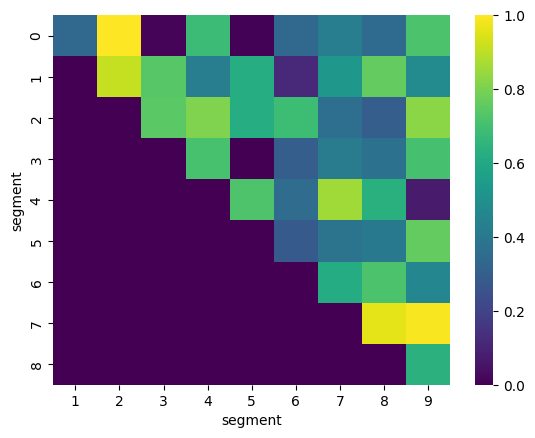

In [31]:
file = '/home/solana/automated-retraining-2/.mass_training/synthetic_2_60_0/results/results.csv'
df = pd.read_csv(file)
scaler = MinMaxScaler()
df[['distance']] = scaler.fit_transform(df[['distance']])
heatmap_data = df.pivot(index='dataset_1', columns='dataset_2', values='distance')
heatmap_data = heatmap_data.fillna(0)
# heatmap_data[heatmap_data > 10] = 0
# heatmap_data = heatmap_data + heatmap_data.T
ax = sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".1f")
ax.set(xlabel="segment", ylabel="segment")

[Text(0.5, 23.52222222222222, 'segment'),
 Text(50.722222222222214, 0.5, 'segment')]

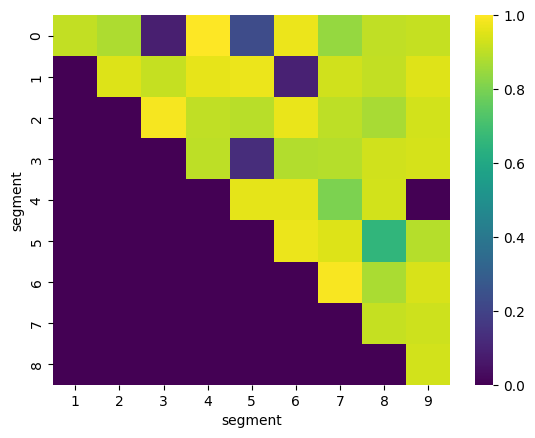

In [38]:
file = '/home/solana/automated-retraining-2/.mass_training/synthetic_2_30_0/results/results_freq_domain.csv'
df = pd.read_csv(file)

heatmap_data = df.pivot(index='dataset_1', columns='dataset_2', values='distance')
heatmap_data = heatmap_data.fillna(0)
# heatmap_data[heatmap_data > 10] = 0
# heatmap_data = heatmap_data + heatmap_data.T
heatmap_data = heatmap_data.rename(columns={'dataset_1': 'dataset', 'dataset_2': 'dataset'})
ax = sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".1f")
ax.set(xlabel="segment", ylabel="segment")

[Text(0.5, 23.52222222222222, 'segment'),
 Text(50.722222222222214, 0.5, 'segment')]

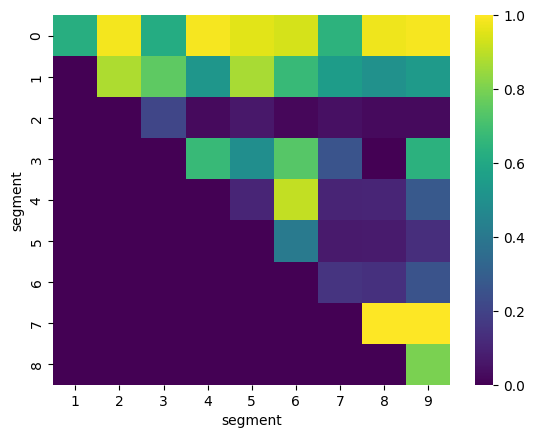

In [8]:
file = '/home/solana/automated-retraining-2/.mass_training/synthetic_80_1/results/drift_results.csv'
df = pd.read_csv(file)
scaler = MinMaxScaler()
df[['distance']] = scaler.fit_transform(df[['distance']])
heatmap_data = df.pivot(index='dataset_1', columns='dataset_2', values='distance')
heatmap_data = heatmap_data.loc[(heatmap_data != -1).any(axis=1)]
heatmap_data = heatmap_data.fillna(0)
ax = sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".1f")
ax.set(xlabel="segment", ylabel="segment")

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.manifold import MDS

# load results
file = '/home/solana/automated-retraining-2/.mass_training/synthetic_2_30_0/results/results_freq_domain.csv'
# file = '/home/solana/automated-retraining-2/.mass_training/synthetic_2_60_0/results/drift_results.csv'
# file = '/home/solana/automated-retraining-2/.mass_training/synthetic_2_30_0/results/results.csv'
# file = '/home/solana/automated-retraining-2/.mass_training/synthetic_80_0/results/results.csv'
df = pd.read_csv(file)
scaler = MinMaxScaler()
# df[['value']] = scaler.fit_transform(df[['value']])
df[['distance']] = scaler.fit_transform(df[['distance']])
df.loc[-1] = [0,0,0]
df.index = df.index + 1
df = df.sort_index()
# distances = df.pivot(index='model', columns='dataset', values='value').fillna(0).to_numpy()
distances = df.pivot(index='dataset_1', columns='dataset_2', values='distance').fillna(0).to_numpy()
points_array = np.vstack((distances, np.zeros((1, distances.shape[1]))))
distance_matrix = points_array+points_array.T

distance_matrix = np.where(distance_matrix < 0, 0, distance_matrix)

clustering = SpectralClustering(n_clusters=4,
        assign_labels='discretize',
        random_state=0).fit(distance_matrix)

n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters, metric='precomputed', max_iter=3000)
kmedoids.fit_predict(distance_matrix)
labels = kmedoids.labels_
labels
labels = clustering.labels_
for i in range(n_clusters):
    print("cluster ", i,)
    cluster = []
    for j in range(len(labels)):
        if labels[j] == i:
            cluster.append(j)
    print(cluster)

cluster  0
[1, 6]
cluster  1
[4, 9]
cluster  2
[0, 3, 5]
cluster  3
[2, 7, 8]
cluster  4
[]


/home/solana/.virtualenvs11/mgr/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


[-0.59485146  0.19101911 -0.61785483  0.1027351  -0.07029615  0.16127793
  0.35633501 -0.16360564  0.23195101  0.40328993]

Cluster Labels: [1 0 1 2 0 4 3 4 2 0]
Medoid Indices: [1 0 8 6 5]
Medoid Data Points:
[[ 0.19101911 -0.28495958]
 [-0.59485146 -0.0012218 ]
 [ 0.23195101  0.08193418]
 [ 0.35633501  0.14372629]
 [ 0.16127793  0.36445431]]


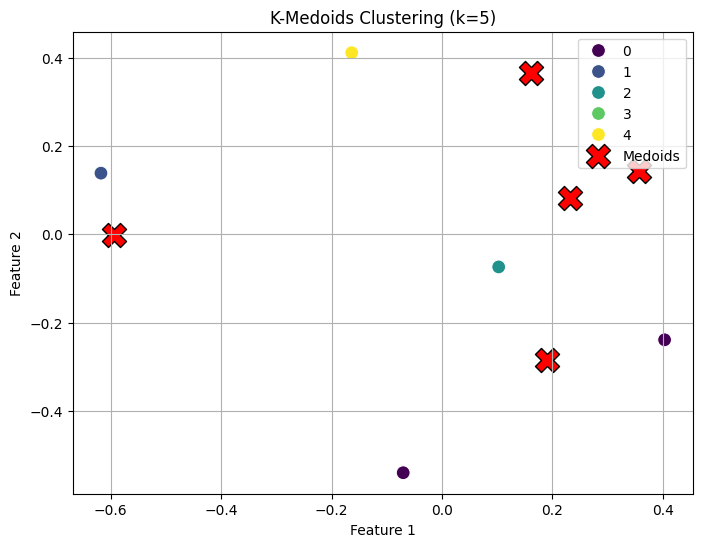

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.manifold import MDS

# load results
file = '/home/solana/automated-retraining-2/.mass_training/synthetic_12/results/drift_results.csv'
df = pd.read_csv(file)
scaler = MinMaxScaler()
df[['value']] = scaler.fit_transform(df[['value']])
df.loc[-1] = [0,0,0]
df.index = df.index + 1
df = df.sort_index()
# points_array = df.pivot()[['model', 'dataset']].to_numpy()
distances = df.pivot(index='model', columns='dataset', values='value').fillna(0).to_numpy()
points_array = np.vstack((distances, np.zeros((1, distances.shape[1]))))
distance_matrix = points_array+points_array.T

# Convert the distance vector back into a matrix (Optional, but helpful)
# You can use pdist and squareform to do this
from scipy.spatial.distance import squareform
# distance_matrix = squareform(distances)

# Create an MDS object
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0, max_iter=3000,eps=1e-9)

X = mds.fit_transform(distance_matrix)


# distance_matrix = pairwise_distances(X, metric='euclidean')

# 3. Apply KMedoids clustering using the distance matrix
# Choose the number of clusters (k)
n_clusters = 5

# Initialize KMedoids with metric='precomputed'
kmedoids = KMedoids(n_clusters=n_clusters, metric='precomputed', random_state=0)

# Fit the model to the distance matrix
# Note: You pass the distance matrix, not the original data X
kmedoids.fit(distance_matrix)

# Get the cluster labels for each data point
labels = kmedoids.labels_

# Get the indices of the medoids (the actual data points that are cluster centers)
medoid_indices = kmedoids.medoid_indices_

print(X[:, 0])

print(f"\nCluster Labels: {labels}")
print(f"Medoid Indices: {medoid_indices}")
print(f"Medoid Data Points:\n{X[medoid_indices]}")

# 4. Visualize the results (optional, for 2D data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=100, legend='full')
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], marker='X', s=300, color='red', label='Medoids', edgecolor='black')
plt.title(f'K-Medoids Clustering (k={n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np


# Flatten the distance matrix into a vector
# (pdist function requires a vector of distances, not a matrix)
distances = pdist(distance_matrix, metric='euclidean')  # Or any other distance metric

# Convert the distance vector back into a matrix (Optional, but helpful)
# You can use pdist and squareform to do this
from scipy.spatial.distance import squareform
distance_matrix = squareform(distances)

# Create an MDS object
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)

# Fit the MDS model to the distance matrix
# You can also use the 'distances' vector from above, but it's more common to use the matrix
coordinates = mds.fit_transform(distance_matrix)

# 'coordinates' is a 2D array where each row represents a point in 2D space
print(coordinates)


[[  7.3429282   10.25572677]
 [  4.20447676   9.75622057]
 [ -2.39687244   6.28322838]
 [ -3.69886774  -3.0201266 ]
 [ -4.22258657   3.986315  ]
 [ -4.51956043   1.9596098 ]
 [ -3.86760962   4.90870339]
 [  0.76082989 -10.55798347]
 [  2.60707723 -11.74180918]
 [  3.79018473 -11.82988467]]
